<a href="https://colab.research.google.com/github/Avazbek-CNU/Medical-cost-prediction/blob/main/Medical_Cost_Personal_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

Content

**Columns**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

**Inspiration**

Can you accurately predict insurance costs?

## Importing the libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [47]:
df=pd.read_csv('insurance.csv')

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
df.shape

(1338, 7)

In [50]:
# Convert categorical variables to numeric
df = pd.get_dummies(data=df, columns=['sex', 'smoker', 'region'])

In [51]:
X = df.iloc[:, :-1].values
y = df['charges'].values

In [52]:
print(X)

[[19.   27.9   0.   ...  0.    0.    0.  ]
 [18.   33.77  1.   ...  0.    0.    1.  ]
 [28.   33.    3.   ...  0.    0.    1.  ]
 ...
 [18.   36.85  0.   ...  0.    0.    1.  ]
 [21.   25.8   0.   ...  0.    0.    0.  ]
 [61.   29.07  0.   ...  0.    1.    0.  ]]


In [53]:
print(y)

[16884.92  1725.55  4449.46 ...  1629.83  2007.94 29141.36]


## Taking care of missing data

In [54]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

Simple Linear Regression 

## Splitting the dataset into the Training set and Test set

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Simple Linear Regression model on the Training set

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [58]:
y_pred = regressor.predict(X_test)

In [65]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
differences=(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Evaluating the model

In [60]:
from sklearn.metrics import r2_score

In [61]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 1.0


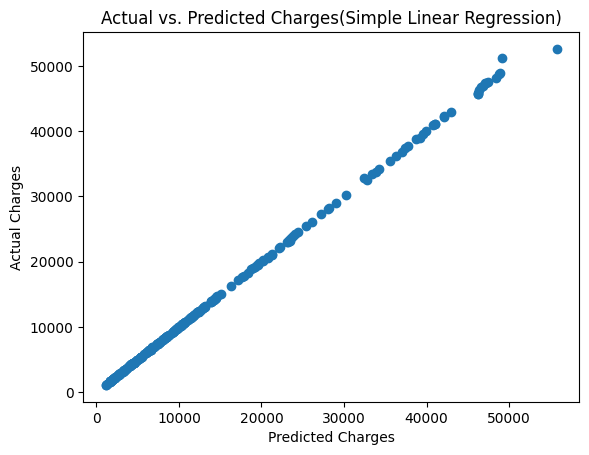

In [99]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Actual vs. Predicted Charges(Simple Linear Regression)')
plt.show()

Training the Polynomial Regression model on the Training set

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [68]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

Predicting the Test set results

In [70]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
differences2=(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Evaluating the Model Performance

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9993543958757358

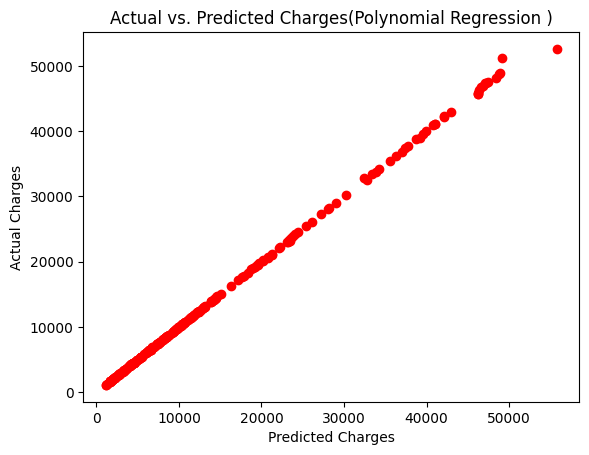

In [100]:
plt.scatter(y_pred, y_test, color = 'red')
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Actual vs. Predicted Charges(Polynomial Regression )')
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Decision Tree Regression model on the Training set

In [85]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Predicting the Test set results

In [89]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
differences3=(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Evaluating the Model Performance

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.999711871895501

Visualizing

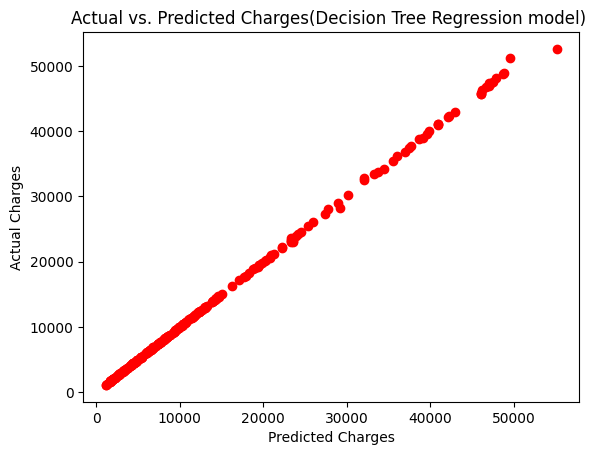

In [91]:
plt.scatter(y_pred, y_test, color = 'red')
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Actual vs. Predicted Charges(Decision Tree Regression model) ')
plt.show()

Random Forest Regression

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Random Forest Regression model on the whole dataset

In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Predicting the Test set results

In [95]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
differences4=(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Evaluating the Model Performance

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9996262179920533

Visualizing

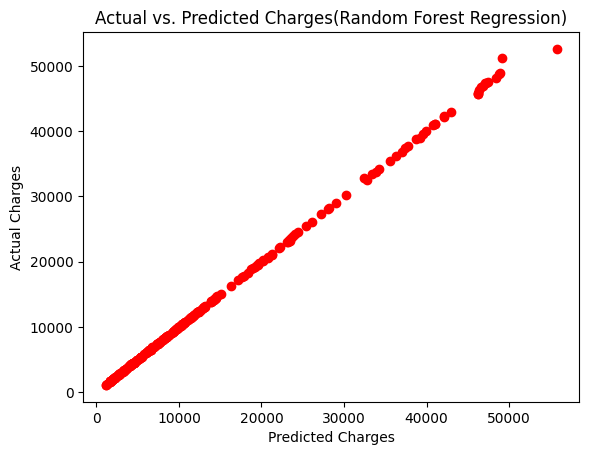

In [97]:
plt.scatter(y_pred, y_test, color = 'red')
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Actual vs. Predicted Charges(Random Forest Regression)')
plt.show()

Conclusion



Linear regression: R-squared: 1.0

Polynomial Regression :R-squared: 0.9993543958757358

Decision Tree Regression:R-squared: 0.999711871895501

Random Forest Regression:R-squared: 0.9996262179920533